In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [15]:
df1 = pd.read_csv('data/df1.csv')
df2 = pd.read_csv('data/df2.csv')
df = pd.concat([df1,df2],0)
df = df[['name','album','artist','id','release_date','popularity','danceability','energy','valence','loudness']]
df.head(n=10)


<ipython-input-15-c8768536704d>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df = pd.concat([df1,df2],0)


,name,album,artist,id,release_date,popularity,danceability,energy,valence,loudness
0,(Nice Dream),The Bends,Radiohead,4QbQ55kHcRNho6XLaPctT1,1995-03-28,55,0.262,0.567,0.3770,-11.075
1,15 Step,In Rainbows,Radiohead,6dsq7Nt5mIFzvm5kIYNORy,2007-12-28,61,0.600,0.853,0.8470,-7.584
2,2 + 2 = 5,Hail To the Thief,Radiohead,37kUGdEJJ7NaMl5LFW4EA4,2003,57,0.443,0.717,0.3860,-5.498
3,A Brain in a Bottle,Tomorrow's Modern Boxes,Thom Yorke,0ztEZNjeZQ45nMcsqYxxyc,2014,43,0.787,0.558,0.4310,-12.365
4,A Punch Up At a Wedding,Hail To the Thief,Radiohead,2LfUYXF8jfrHCfwYyf2pRj,2003,50,0.603,0.507,0.5680,-9.965
5,A Wolf At the Door,Hail To the Thief,Radiohead,66cuLvkHsW7dNkfNk6gQP9,2003,52,0.480,0.675,0.3700,-7.134
6,Airbag,OK Computer,Radiohead,3OsUjkcv1C1v5udFhgRSFg,1997-05-28,58,0.306,0.872,0.6480,-7.313
7,Airbag - Remastered,OK Computer OKNOTOK 1997 2017,Radiohead,4F4Wtw45jKohdzu9onG6WH,2017-06-23,48,0.319,0.935,0.6300,-5.709
8,Amok,AMOK,Atoms For Peace,2r4cSpg6mKnb8wBBN5g5hz,2013-02-25,38,0.618,0.811,0.6690,-7.075
9,An Audition,Suspiria (Music for the Luca Guadagnino Film),Thom Yorke,74hnCqoBekV3fj5ACDKNIP,2018-10-26,25,0.198,0.397,0.0395,-13.971


In [16]:
df.shape

(423, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 196
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          423 non-null    object 
 1   album         423 non-null    object 
 2   artist        423 non-null    object 
 3   id            423 non-null    object 
 4   release_date  423 non-null    object 
 5   popularity    423 non-null    int64  
 6   danceability  423 non-null    float64
 7   energy        423 non-null    float64
 8   valence       423 non-null    float64
 9   loudness      423 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 36.4+ KB


In [19]:
df.describe()

,popularity,danceability,energy,valence,loudness
count,423.000000,423.000000,423.000000,423.000000,423.000000
mean,32.628842,0.395588,0.446771,0.236248,-12.805064
std,17.830344,0.203246,0.267740,0.221957,5.176817
min,0.000000,0.000000,0.000791,0.000000,-36.892000
25%,17.000000,0.228000,0.210000,0.047200,-15.899500
50%,33.000000,0.358000,0.420000,0.157000,-11.826000
75%,47.000000,0.563500,0.664500,0.345000,-8.801500
max,82.000000,0.890000,0.985000,0.964000,-4.345000


In [20]:
pd.set_option('max_columns', None)
df.corr()

,popularity,danceability,energy,valence,loudness
popularity,1.000000,0.053766,0.304226,0.240772,0.426466
danceability,0.053766,1.000000,0.490367,0.518894,0.406962
energy,0.304226,0.490367,1.000000,0.556676,0.760943
valence,0.240772,0.518894,0.556676,1.000000,0.420528
loudness,0.426466,0.406962,0.760943,0.420528,1.000000


<AxesSubplot:>

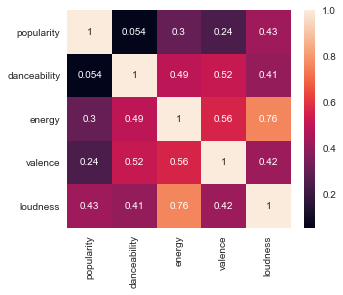

In [18]:
corr = df.corr()
fig,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)

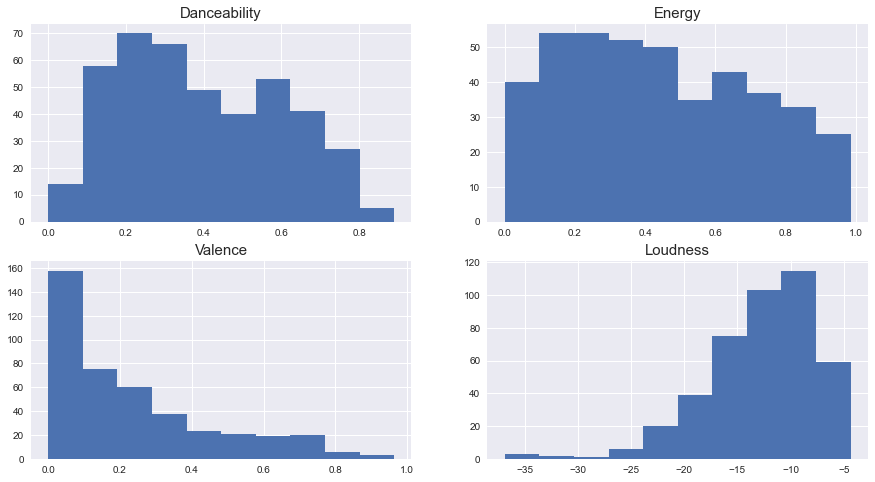

In [21]:
fig,axes = plt.subplots(2,2,figsize=(15,8))
axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [23]:
col_features = df.columns[6:]
X = MinMaxScaler().fit_transform(df[col_features])
X

array([[0.29438202, 0.57529346, 0.39107884, 0.79322211],
       [0.6741573 , 0.86588214, 0.87863071, 0.90048238],
       [0.49775281, 0.72770011, 0.40041494, 0.96457431],
       ...,
       [0.28764045, 0.23593464, 0.03506224, 0.66986205],
       [0.29101124, 0.23593464, 0.03495851, 0.67029219],
       [0.16853933, 0.19630891, 0.14004149, 0.74793376]])

In [ ]:
def in(data, k):
    '''
    initialized the centroids for K-means++
    inputs
        data - numpy array of data points having shape (200, 2)
        k - number of clusters
    '''
    ## initialize the centroids list and add
    ## a randomly selected data point to the list
    centroids = []
    temp_dist = 1
    centroids.append(data[np.random.randint(
            data.shape[0]), :])
    plot(data, np.array(centroids))

    ## compute remaining k - 1 centroids
    for c_id in range(k - 1):

        ## initialize a list to store distances of data
        ## points from nearest centroid
        dist = []
        for i in range(data.shape[0]):
            point = data[i, :]
            d = sys.maxsize

            ## compute distance of 'point' from each of the previously
            ## selected centroid and store the minimum distance
            for j in range(len(centroids)):
                temp_dist = distance(point, centroids[j])
                d = min(d, temp_dist)
            dist.append(d)

        ## select data point with maximum distance as our next centroid
        dist = np.array(dist)
        next_centroid = data[np.argmax(dist), :]
        centroids.append(next_centroid)
        dist = []
        plot(data, np.array(centroids))
    return centroids

In [6]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [7]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

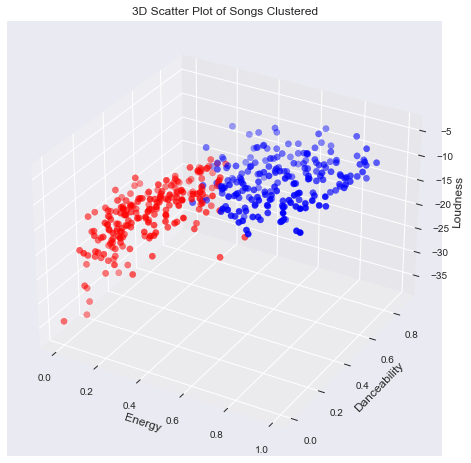

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")



In [9]:
df.groupby(['kmeans']).mean()

,popularity,danceability,energy,valence,loudness
kmeans,,,,,
0,37.557143,0.523190,0.665690,0.374453,-9.699890
1,27.769953,0.269783,0.230934,0.099990,-15.866502


In [10]:
cluster_0 = df[df['kmeans']==0] #Energised
cluster_1  = df[df['kmeans']==1] #Relaxed

In [11]:
cluster_0.to_csv("data/cluster0.csv",index=False)
cluster_1.to_csv("data/cluster1.csv",index=False)
df.to_csv("data/df.csv",index=False)